# Notebook 01: Problem Statement & Exploratory Data Analysis

**Student Name:** Wesley Houk

**Dataset:** crop_yield_dataset.csv

**Checkpoints:**
- Checkpoint 1 (Due Feb 1): Sections 1-3
- Checkpoint 2 (Due Feb 8): Sections 4-6

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before each checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll see text cells asking you to explain your decisions, observations, and reasoning. **These written reflections are a critical part of your grade.** 

Don't just write one-word answers or skip these sections. Your reflections demonstrate:
- Your understanding of the data science process
- Your ability to communicate findings to stakeholders
- Your critical thinking about data quality and feature importance

Take time to write thoughtful, complete responses. This is what separates a good data scientist from someone who just runs code!

---

## Setup

Run this cell first to import all necessary libraries.

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


---

# CHECKPOINT 1 (Due: Feb 1)

---

## Section 1: Problem Statement

### 1.1 What are you trying to predict?

*Clearly state your target variable and what it represents.*

**Your answer:**

I am trying to predict the crop yield in tons per hectare.

---

### 1.2 Why does this prediction matter?

*Who would care about this prediction? What decisions could be made with it?*

**Your answer:**

This is very important for farmers. An increase in yeild for them is important for many reasons whether they are trying to grow food for their families, their animals, or just trying to turn a profit. With this information they can plan on what they need to grow based off of their climate, how much fertilizer they need to use, irrigation needed, planting density etc. 

---

### 1.3 What features might help predict the target?

*Based on your intuition and domain knowledge, what columns do you think will be most important?*

**Your answer:**

I think the most important features are crop type, soil type and region. ie you can't grow rice in a desert no matter how good the soil is. You can't grow dates in rice fields.

## Section 2: Dataset Overview

### 2.1 Load Your Data

In [2]:
# Load your dataset
# Update the path to match your file name
df = pd.read_csv('../data/raw/crop_yield_dataset.csv')

# Display basic info
print(f"Dataset shape: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\nColumn names:")
print(df.columns.tolist())

Dataset shape: 10,000 rows, 13 columns

Column names:
['Crop', 'Region', 'Soil_Type', 'Soil_pH', 'Rainfall_mm', 'Temperature_C', 'Humidity_pct', 'Fertilizer_Used_kg', 'Irrigation', 'Pesticides_Used_kg', 'Planting_Density', 'Previous_Crop', 'Yield_ton_per_ha']


In [3]:
# TODO: View the first 5 rows of your dataframe
#
# Hint: Use .head()

# YOUR CODE HERE:
df.head()

,Crop,Region,Soil_Type,Soil_pH,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Irrigation,Pesticides_Used_kg,Planting_Density,Previous_Crop,Yield_ton_per_ha
0,Maize,Region_C,Sandy,7.01,1485.4,19.7,40.3,105.1,Drip,10.2,23.2,Rice,101.48
1,Barley,Region_D,Loam,5.79,399.4,29.1,55.4,221.8,Sprinkler,35.5,7.4,Barley,127.39
2,Rice,Region_C,Clay,7.24,980.9,30.5,74.4,61.2,Sprinkler,40.0,5.1,Wheat,68.99
3,Maize,Region_D,Loam,6.79,1054.3,26.4,62.0,257.8,Drip,42.7,23.7,NaN,169.06
4,Maize,Region_D,Sandy,5.96,744.6,20.4,70.9,195.8,Drip,25.5,15.6,Maize,118.71


In [4]:
# TODO: View the last 5 rows of your dataframe
#
# Hint: Use .tail()

# YOUR CODE HERE:
df.tail()

,Crop,Region,Soil_Type,Soil_pH,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Irrigation,Pesticides_Used_kg,Planting_Density,Previous_Crop,Yield_ton_per_ha
9995,Barley,Region_A,Clay,5.84,890.4,28.5,68.6,82.5,Flood,4.0,24.1,Wheat,79.83
9996,Maize,Region_A,Sandy,6.91,614.2,30.0,84.2,85.2,NaN,21.7,8.3,Maize,68.24
9997,Wheat,Region_A,Clay,6.98,842.0,22.6,75.1,249.2,Sprinkler,8.8,18.1,Rice,159.29
9998,Wheat,Region_D,Sandy,7.27,924.2,26.8,50.8,146.1,Sprinkler,3.3,18.1,Maize,99.08
9999,Rice,Region_C,Sandy,5.95,247.0,31.1,66.2,223.4,Flood,18.7,12.1,Rice,121.30


### 2.2 Data Types and Info

In [5]:
# TODO: Display info about your dataframe (data types, non-null counts)
#
# Hint: Use .info()

# YOUR CODE HERE:
df.info

<bound method DataFrame.info of         Crop    Region Soil_Type  Soil_pH  Rainfall_mm  Temperature_C  \
0      Maize  Region_C     Sandy     7.01       1485.4           19.7   
1     Barley  Region_D      Loam     5.79        399.4           29.1   
2       Rice  Region_C      Clay     7.24        980.9           30.5   
3      Maize  Region_D      Loam     6.79       1054.3           26.4   
4      Maize  Region_D     Sandy     5.96        744.6           20.4   
...      ...       ...       ...      ...          ...            ...   
9995  Barley  Region_A      Clay     5.84        890.4           28.5   
9996   Maize  Region_A     Sandy     6.91        614.2           30.0   
9997   Wheat  Region_A      Clay     6.98        842.0           22.6   
9998   Wheat  Region_D     Sandy     7.27        924.2           26.8   
9999    Rice  Region_C     Sandy     5.95        247.0           31.1   

      Humidity_pct  Fertilizer_Used_kg Irrigation  Pesticides_Used_kg  \
0             40.3

In [6]:
# TODO: Get summary statistics for numerical columns
#
# Hint: Use .describe()

# YOUR CODE HERE:
df.describe()

,Soil_pH,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Pesticides_Used_kg,Planting_Density,Yield_ton_per_ha
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.516693,843.66467,24.975750,60.052550,175.083290,25.055500,14.997930,117.891105
std,0.574761,373.67076,5.790631,17.317097,71.964157,14.353483,5.833087,37.972664
min,5.500000,200.00000,15.000000,30.000000,50.000000,0.000000,5.000000,28.450000
25%,6.020000,518.00000,20.000000,45.100000,113.300000,12.600000,9.900000,87.135000
50%,6.520000,845.30000,24.900000,60.200000,175.000000,25.300000,15.000000,117.705000
75%,7.010000,1161.85000,30.100000,75.100000,237.900000,37.500000,20.100000,149.147500
max,7.500000,1499.70000,35.000000,90.000000,300.000000,50.000000,25.000000,207.210000


In [7]:
# TODO: Get summary statistics for categorical columns
#
# Hint: Use .describe(include='object')

# YOUR CODE HERE:
df.describe(include='object')

,Crop,Region,Soil_Type,Irrigation,Previous_Crop
count,10000,10000,10000,7462,7969
unique,4,4,3,3,4
top,Rice,Region_A,Loam,Flood,Rice
freq,2536,2561,3388,2530,2072


### 2.3 Dataset Description

*After looking at the data above, describe your dataset in your own words.*

**Questions to answer:**
- Where did this data come from? (Kaggle link, source)
- What does each row represent?
- How many features do you have?
- What types of features do you have? (numerical, categorical)

**Your description:**

This dataset came from kaggle. Each row represents a particular crop and the environmental variables that contributed to the yield. I have 13 features including the target feature of yield. I have 5 categorical features: Crop, Region, Soil_Type, Irrigation, Previous_Crop. I also have 8 numerical features: Soil_ph, Rainfall_mm, Temperature_C, Humidity_pct, Fertilizer_Used_kg, Pesticides_Used_kg, Planting_Density, Yield_ton_per_ha.

## Section 3: Initial EDA

### 3.1 Target Variable Analysis

In [8]:
# Define your target variable
TARGET = 'Yield_ton_per_ha'  # <-- UPDATE THIS!

# Basic statistics of target
print(f"Target Variable: {TARGET}")
print(f"\nBasic Statistics:")
print(df[TARGET].describe())

Target Variable: Yield_ton_per_ha

Basic Statistics:
count    10000.000000
mean       117.891105
std         37.972664
min         28.450000
25%         87.135000
50%        117.705000
75%        149.147500
max        207.210000
Name: Yield_ton_per_ha, dtype: float64


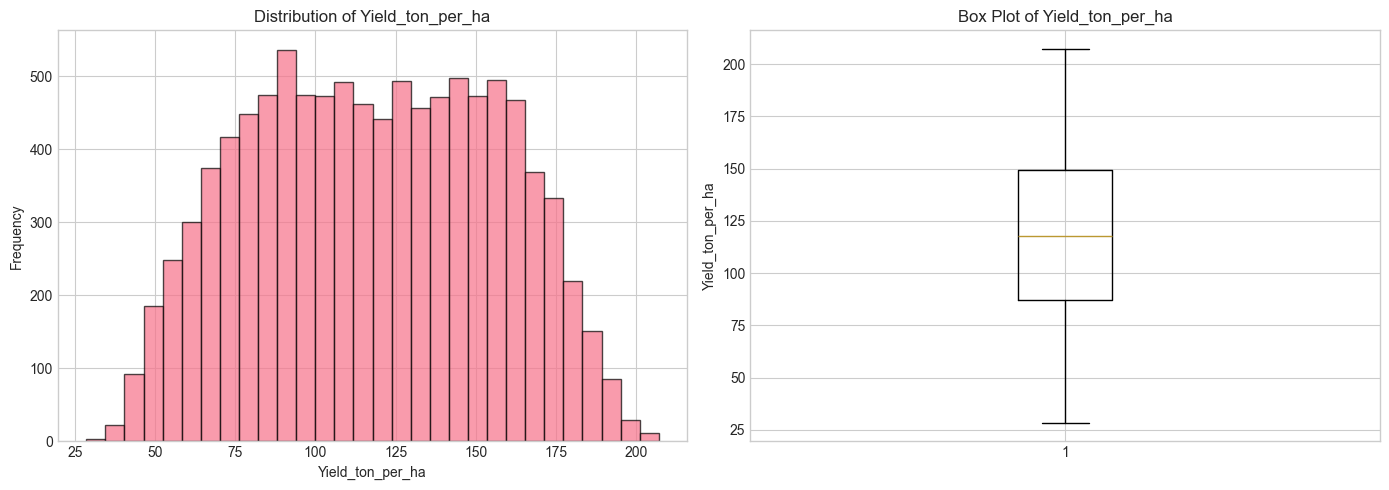


Skewness: -0.01
→ Target is approximately symmetric.


In [9]:
# Distribution of target variable
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[TARGET].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_xlabel(TARGET)
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Distribution of {TARGET}')

# Box plot
axes[1].boxplot(df[TARGET].dropna())
axes[1].set_ylabel(TARGET)
axes[1].set_title(f'Box Plot of {TARGET}')

plt.tight_layout()
plt.show()

# Check skewness
skewness = df[TARGET].skew()
print(f"\nSkewness: {skewness:.2f}")
if abs(skewness) > 1:
    print("→ Target is highly skewed. Consider log transform in feature engineering.")
elif abs(skewness) > 0.5:
    print("→ Target is moderately skewed.")
else:
    print("→ Target is approximately symmetric.")

### 3.2 Data Quality Checks

In [15]:
# TODO: Check for duplicate rows in your dataframe
#
# Steps:
# 1. Count how many duplicate rows exist using df.duplicated().sum()
# 2. Print the count and the percentage of duplicates
#
# Expected output format:
# "Duplicate rows: X,XXX (X.XX%)"

# YOUR CODE HERE:
dup_num = df.duplicated().sum()
len_df = len(df)
dup_percent = (dup_num / len_df) * 100

print(f"Duplicate rows: {dup_num} ({dup_percent})%") 

Duplicate rows: 0 (0.0)%


In [31]:
# TODO: Create a summary of missing values
#
# Steps:
# 1. Calculate missing count for each column: df.isnull().sum()
# 2. Calculate missing percentage: (df.isnull().sum() / len(df)) * 100
# 3. Create a DataFrame with 'Missing Count' and 'Missing %' columns
# 4. Sort by 'Missing %' descending
# 5. Display only columns that have missing values
#
# Hint: You can create a DataFrame with pd.DataFrame({'col1': series1, 'col2': series2})

# YOUR CODE HERE:
missing_count = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({"Missing Count": missing_count, "Missing %": missing_percent})
missing_df = (missing_df.sort_values(by="Missing %", ascending=False))
missing_df = missing_df[missing_df["Missing Count"] > 0]

missing_df


,Missing Count,Missing %
Irrigation,2538,25.38
Previous_Crop,2031,20.31


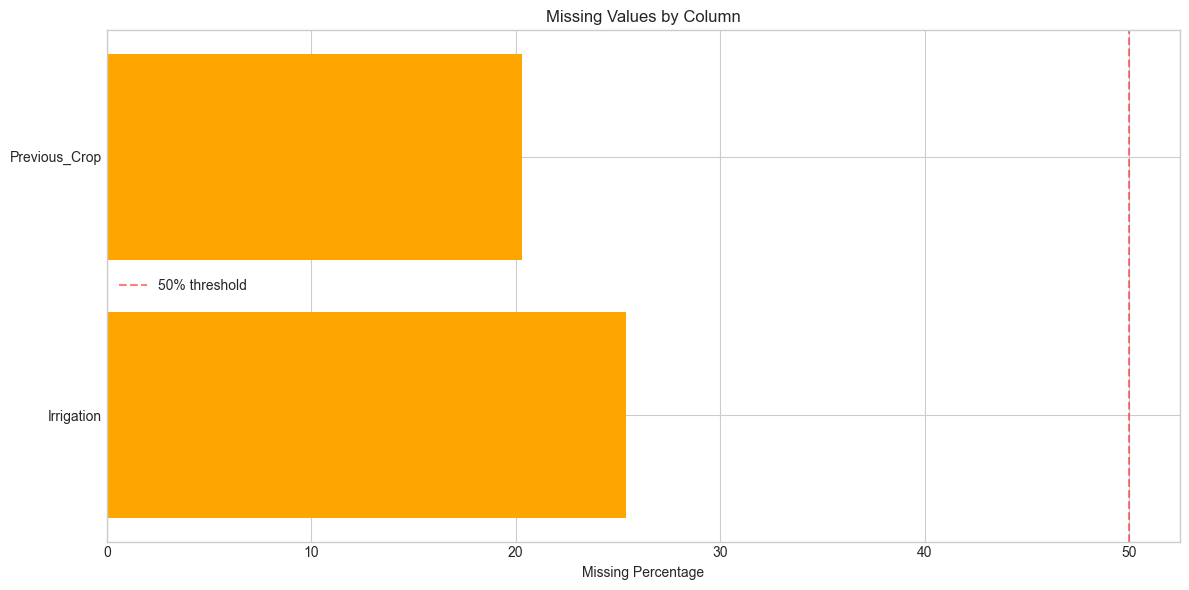

In [26]:
# Visualize missing values (if any)
if df.isnull().sum().sum() > 0:
    plt.figure(figsize=(12, 6))
    missing_cols = missing_df[missing_df['Missing Count'] > 0]
    colors = ['red' if pct > 50 else 'orange' if pct > 20 else 'steelblue' 
              for pct in missing_cols['Missing %']]
    plt.barh(missing_cols.index, missing_cols['Missing %'], color=colors)
    plt.xlabel('Missing Percentage')
    plt.title('Missing Values by Column')
    plt.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Recommendation
    high_missing = missing_cols[missing_cols['Missing %'] > 50]
    if len(high_missing) > 0:
        print(f"\n⚠️ Columns with >50% missing (consider dropping): {high_missing.index.tolist()}")
else:
    print("✓ No missing values in the dataset!")

### 3.3 Initial Observations

*Based on your initial exploration, what do you notice?*

**Questions to consider:**
- Is your target variable normally distributed or skewed?
- Are there any obvious outliers in the target?
- How much missing data do you have to deal with?
- Are there any duplicate rows?
- Any surprises or interesting findings?

**Your observations:**

It seems to have a normally distributed bell curve. There doesn't seem to be any extreme outliers. I have to deal with 2538 missing rows in the Irrigation feature column, and 2031 missing rows in the Previous_Crop feature column. I did not have any duplicate rows in this dataset. I was honestly surprised to have this much missing data. I was also pleasantly suprised to not have any duplicate data. 

---

## ✅ Checkpoint 1 Submission Instructions

**Congratulations!** You've completed Checkpoint 1. Before moving on, let's commit your work and submit.

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub
Open your terminal and run these commands:

```bash
# Navigate to your project folder (if not already there)
cd path/to/your/capstone-project

# Stage your notebook and data
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/raw/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 1: Problem statement and initial EDA"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 1 assignment on Canvas
2. Submit the link to your GitHub repository
3. Make sure your repo shows your latest commit!

### Step 4: Continue to Checkpoint 2
Now proceed to **Section 4** below to continue with your complete EDA, data cleaning, and feature engineering.

---

---

# CHECKPOINT 2 (Due: Feb 8)

---

## Section 4: Complete EDA

### 4.1 Numerical Features Analysis

In [ ]:
# TODO: Get a list of numerical columns (excluding the target)
#
# Steps:
# 1. Use df.select_dtypes(include=[np.number]) to get numerical columns
# 2. Get the column names as a list with .columns.tolist()
# 3. Remove TARGET from the list if it's in there
# 4. Print the count and list of numerical features
#
# Store result in: numerical_cols

# YOUR CODE HERE:
df_numerical = df.select_dtypes(include=[np.number])
numerical_cols = df_numerical.columns.tolist()
numerical_cols.pop()

print(f"Number of numerical columns excluding target: {len(numerical_cols)}")
print(f"List of numerical features excluding target: {numerical_cols}")

Number of numerical columns excluding target: 7
List of numerical features excluding target: ['Soil_pH', 'Rainfall_mm', 'Temperature_C', 'Humidity_pct', 'Fertilizer_Used_kg', 'Pesticides_Used_kg', 'Planting_Density']


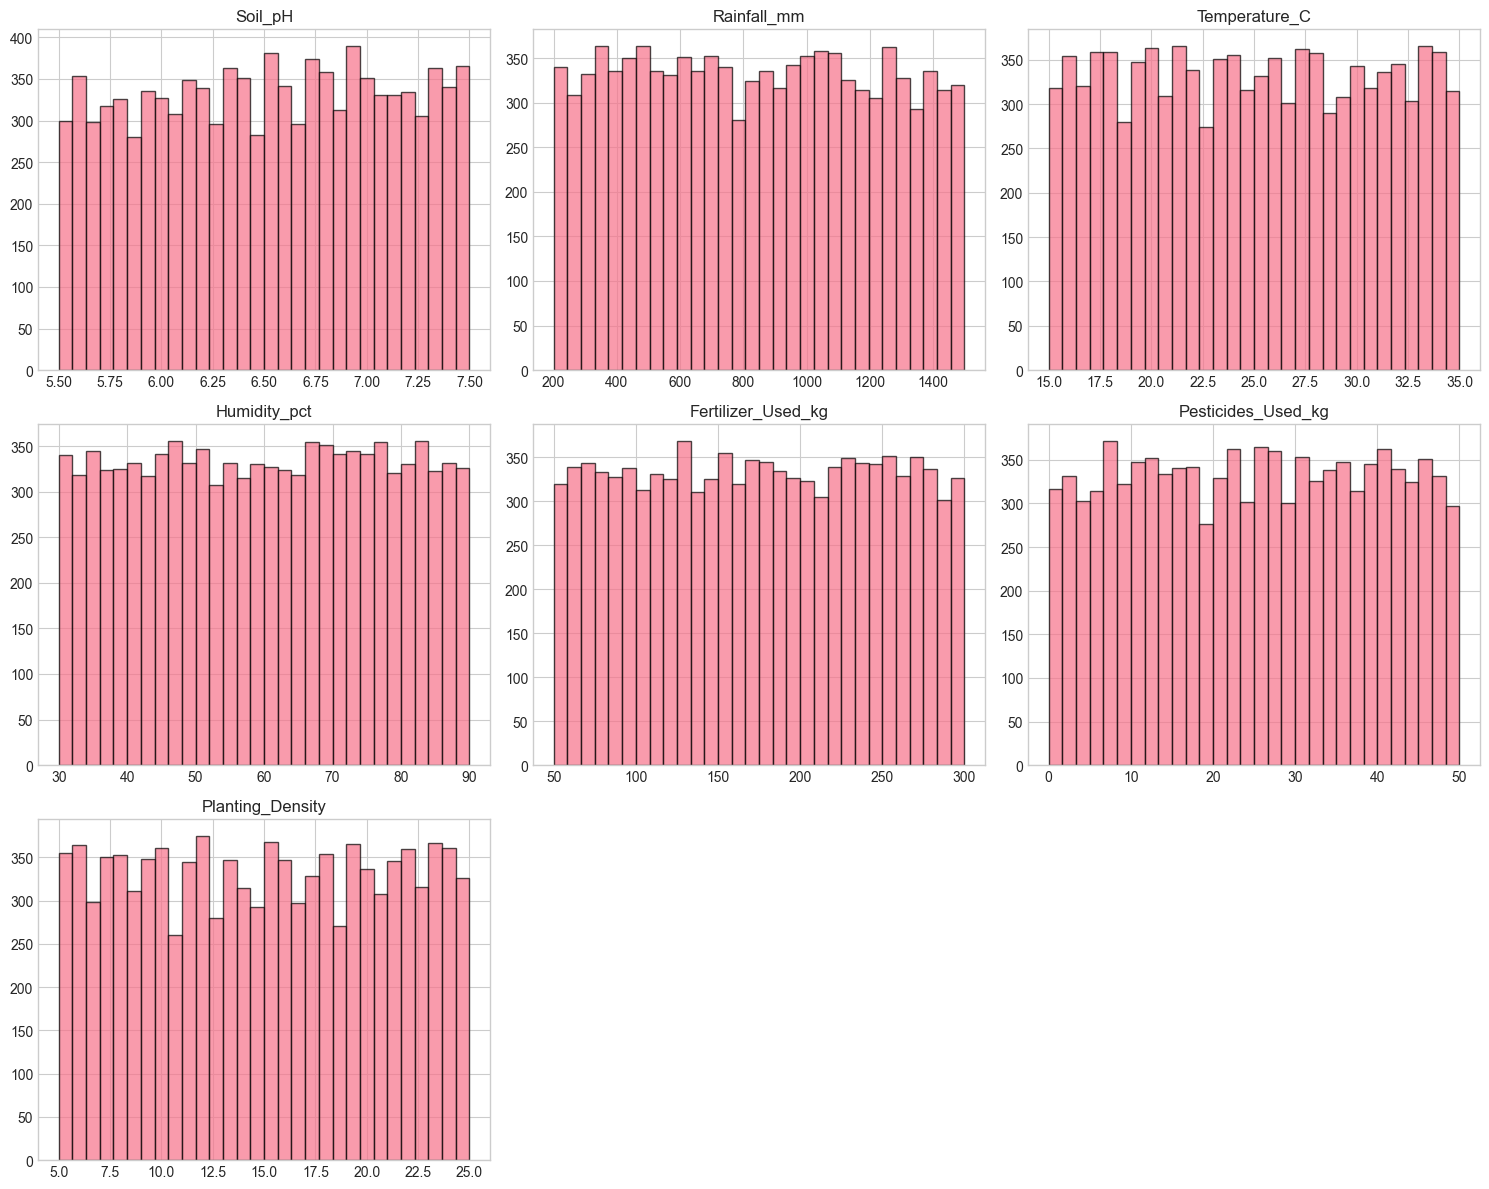

In [39]:
# Distribution of numerical features
if len(numerical_cols) > 0:
    n_cols = 3
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if n_rows == 1 and n_cols == 1 else axes

    for i, col in enumerate(numerical_cols):
        axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(col)
        axes[i].set_xlabel('')

    # Hide empty subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features found (besides target).")

### 4.2 Categorical Features Analysis

In [47]:
# TODO: Get a list of categorical columns and explore their values
#
# Steps:
# 1. Use df.select_dtypes(include=['object', 'category']) to get categorical columns
# 2. Get the column names as a list
# 3. Print the count and list of categorical features
# 4. For each categorical column, print:
#    - Number of unique values: df[col].nunique()
#    - Top 10 value counts: df[col].value_counts().head(10)
#
# Store result in: categorical_cols

# YOUR CODE HERE:
df_categorical = df.select_dtypes(include=['object', 'category'])
categorical_cols = df_categorical.columns.tolist()

print(f"Number of categorical columns: {len(categorical_cols)}")
print(f"List of categorical features: {categorical_cols}")

for col in categorical_cols:
    print(f"Number of unique values: {df[col].nunique()}")
    print(f"Top 10 value counts: {df[col].value_counts().head(10)}")

Number of categorical columns: 5
List of categorical features: ['Crop', 'Region', 'Soil_Type', 'Irrigation', 'Previous_Crop']
Number of unique values: 4
Top 10 value counts: Crop
Rice      2536
Barley    2501
Wheat     2486
Maize     2477
Name: count, dtype: int64
Number of unique values: 4
Top 10 value counts: Region
Region_A    2561
Region_B    2501
Region_D    2492
Region_C    2446
Name: count, dtype: int64
Number of unique values: 3
Top 10 value counts: Soil_Type
Loam     3388
Sandy    3328
Clay     3284
Name: count, dtype: int64
Number of unique values: 3
Top 10 value counts: Irrigation
Flood        2530
Drip         2472
Sprinkler    2460
Name: count, dtype: int64
Number of unique values: 4
Top 10 value counts: Previous_Crop
Rice      2072
Maize     1972
Barley    1965
Wheat     1960
Name: count, dtype: int64


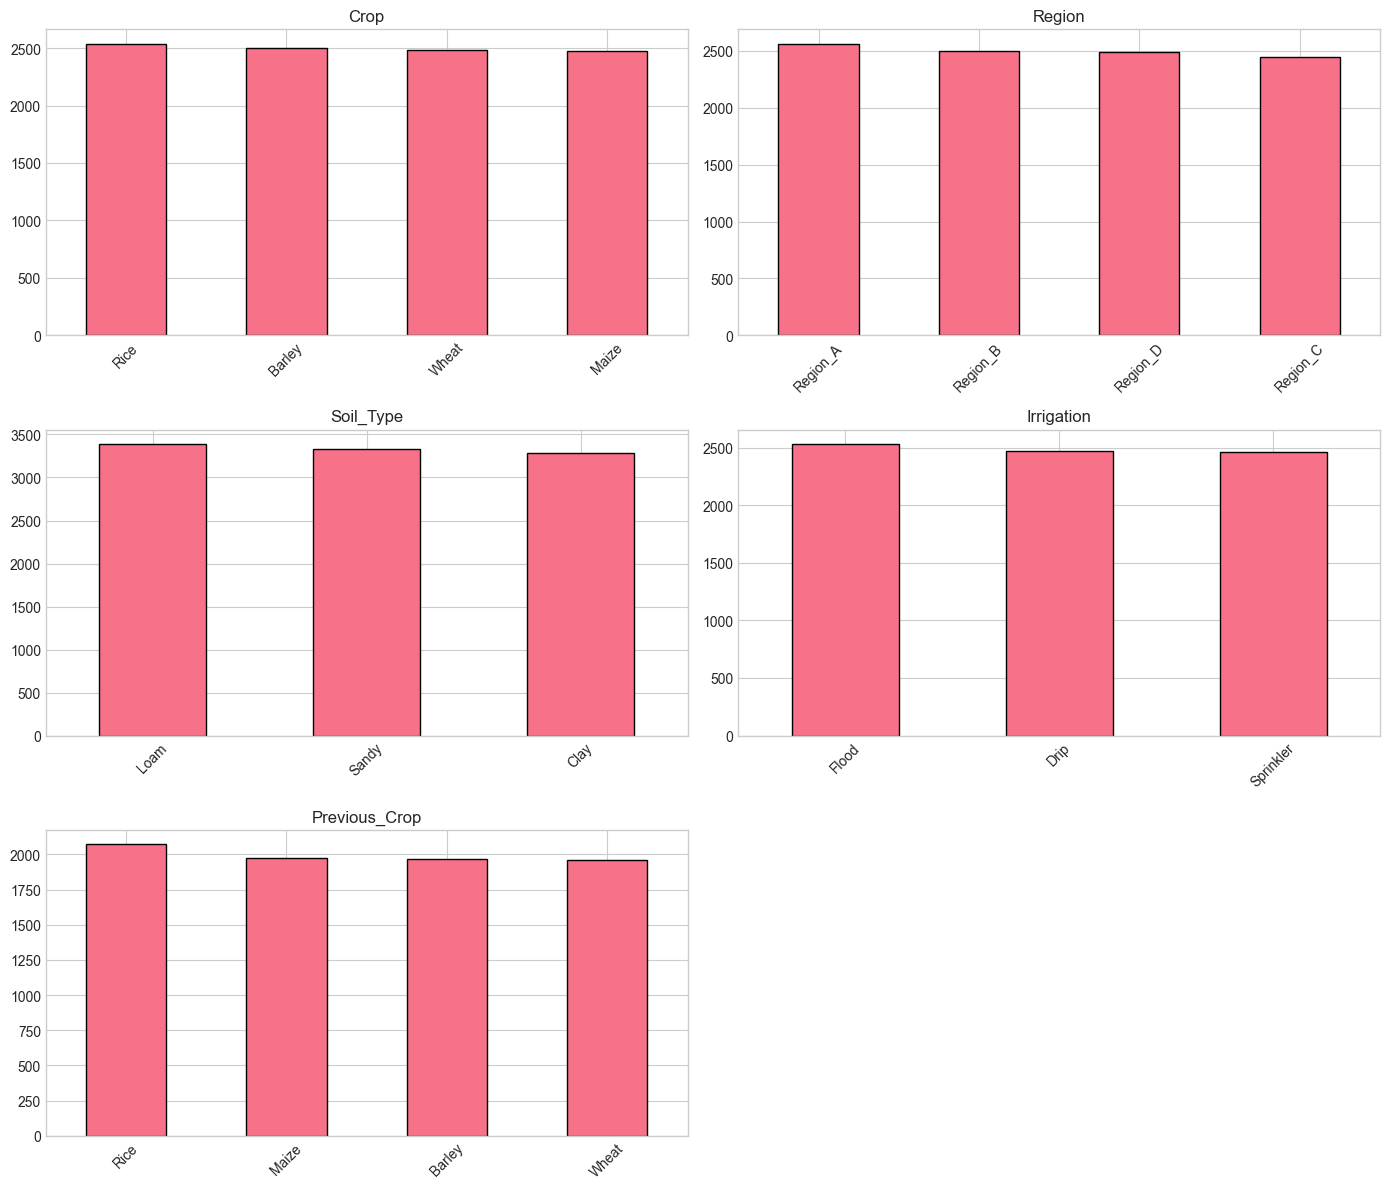

In [48]:
# Visualize categorical features (for columns with reasonable number of categories)
cat_cols_to_plot = [col for col in categorical_cols if df[col].nunique() <= 10]

if cat_cols_to_plot:
    n_cols = 2
    n_rows = (len(cat_cols_to_plot) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4*n_rows))
    axes = axes.flatten() if n_rows > 1 else [axes] if len(cat_cols_to_plot) == 1 else axes
    
    for i, col in enumerate(cat_cols_to_plot):
        df[col].value_counts().plot(kind='bar', ax=axes[i], edgecolor='black')
        axes[i].set_title(col)
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide empty subplots
    for j in range(len(cat_cols_to_plot), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
else:
    print("No categorical columns with ≤10 unique values to plot.")

### 4.3 Categorical Features vs Target

*How does the target variable differ across categories?*

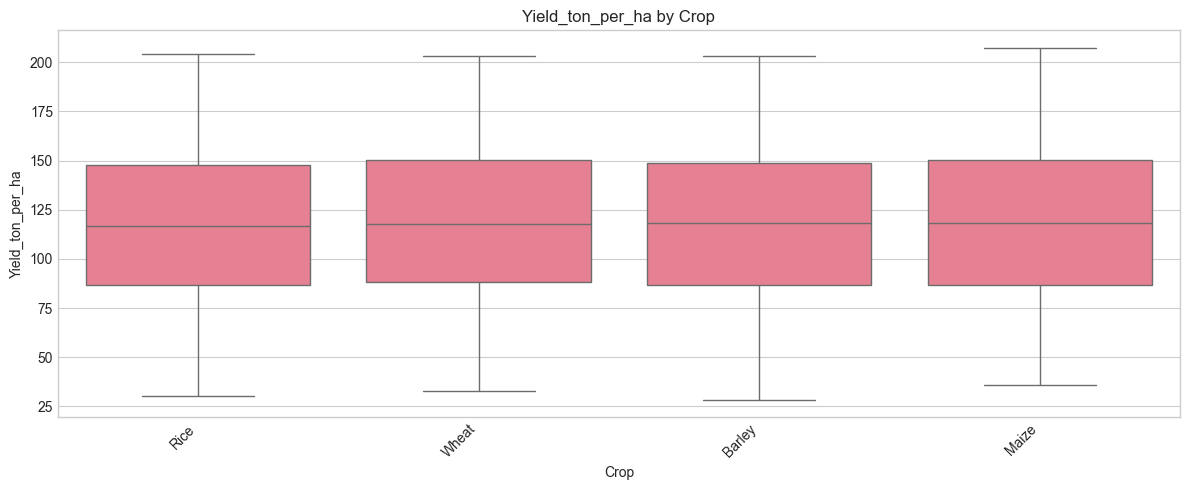


Mean Yield_ton_per_ha by Crop:
              mean   median  count
Crop                              
Wheat   118.647132  117.655   2486
Maize   118.111264  118.370   2477
Barley  117.637529  118.240   2501
Rice    117.185024  116.775   2536



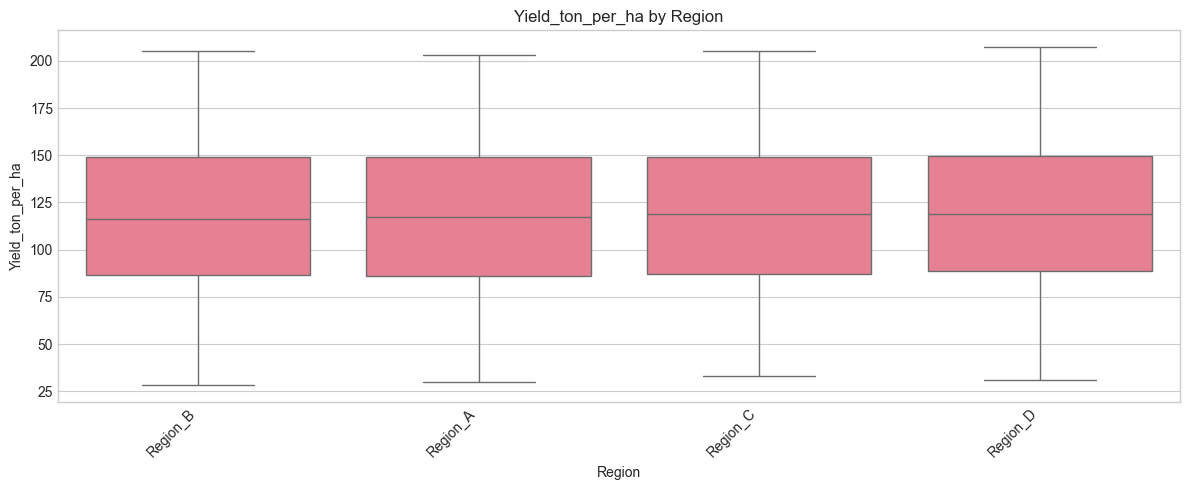


Mean Yield_ton_per_ha by Region:
                mean   median  count
Region                              
Region_D  118.845169  118.770   2492
Region_C  118.407155  118.765   2446
Region_A  117.275873  117.550   2561
Region_B  117.065766  116.180   2501



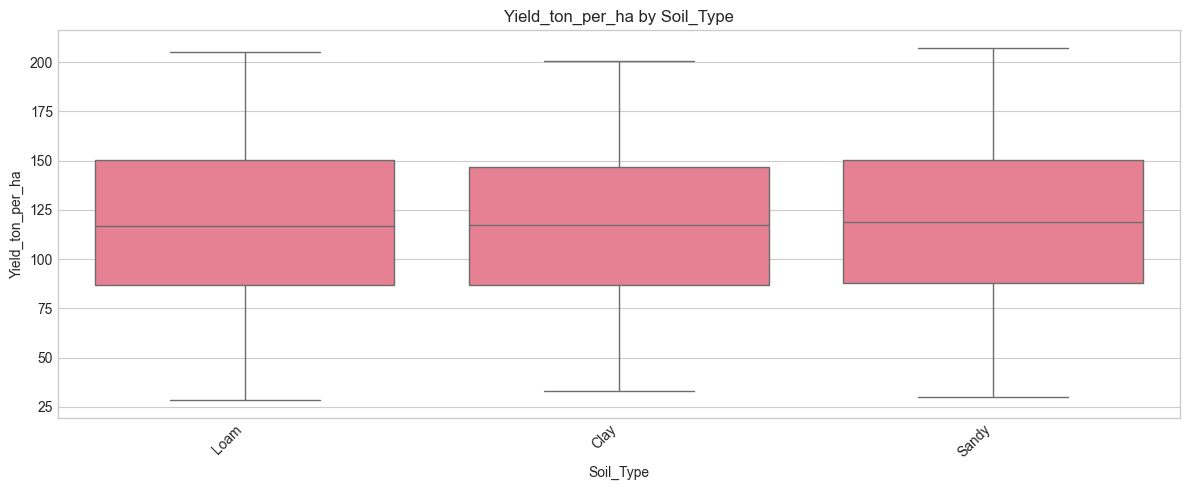


Mean Yield_ton_per_ha by Soil_Type:
                 mean   median  count
Soil_Type                            
Sandy      118.467545  119.040   3328
Loam       117.901975  116.875   3388
Clay       117.295728  117.290   3284



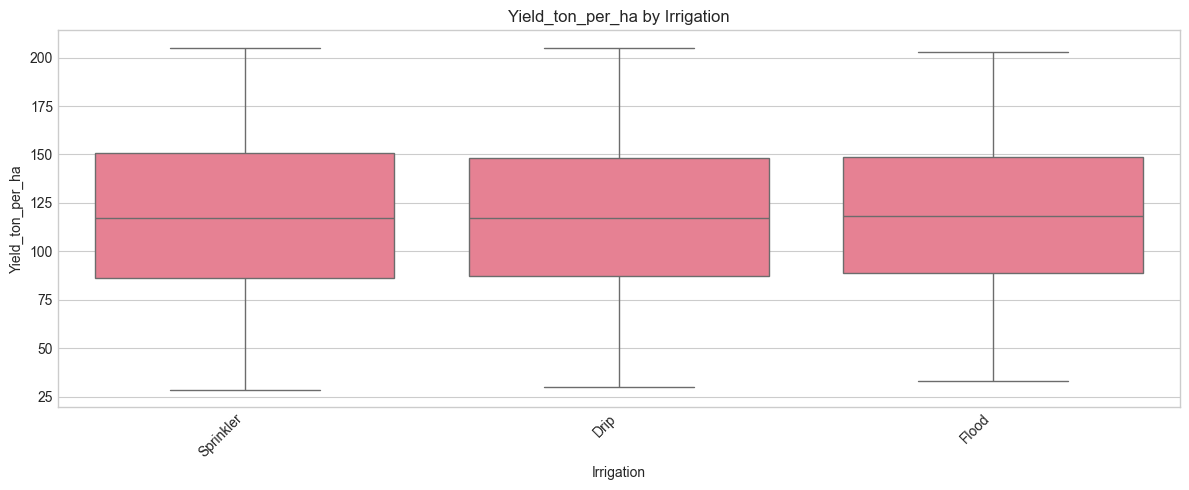


Mean Yield_ton_per_ha by Irrigation:
                  mean   median  count
Irrigation                            
Flood       118.408953  118.020   2530
Sprinkler   117.738037  116.960   2460
Drip        117.704231  117.405   2472



In [49]:
# Box plots: Target by categorical features
cat_cols_to_analyze = [col for col in categorical_cols if df[col].nunique() <= 8]

if cat_cols_to_analyze:
    for col in cat_cols_to_analyze[:4]:  # Limit to first 4 for readability
        plt.figure(figsize=(12, 5))
        
        # Order by median target value
        order = df.groupby(col)[TARGET].median().sort_values().index
        
        sns.boxplot(data=df, x=col, y=TARGET, order=order)
        plt.title(f'{TARGET} by {col}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        # Show mean target by category
        print(f"\nMean {TARGET} by {col}:")
        print(df.groupby(col)[TARGET].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False))
        print("\n" + "="*50)
else:
    print("No suitable categorical columns for this analysis.")

### 4.4 Correlation Analysis

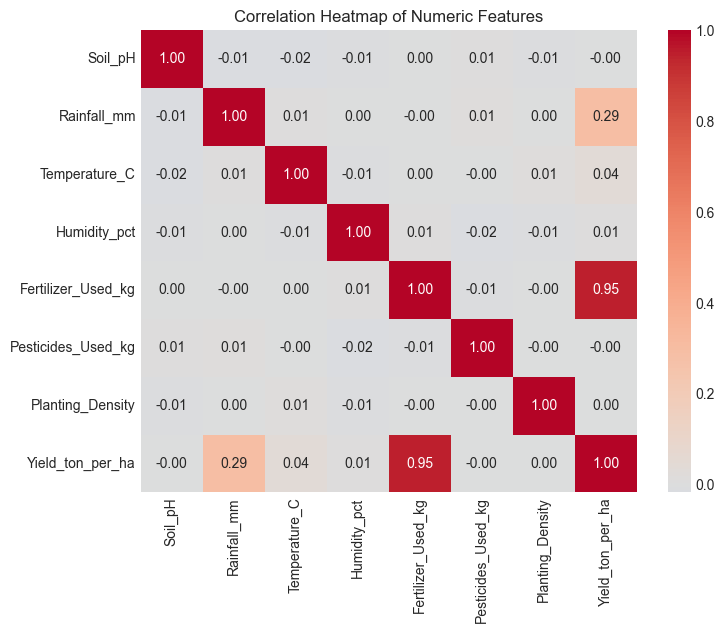

In [56]:
# TODO: Create and visualize a correlation matrix
#
# Steps:
# 1. Create a list of columns: numerical_cols + [TARGET]
# 2. Calculate the correlation matrix: df[columns].corr()
# 3. Create a heatmap using sns.heatmap()
#
# Heatmap parameters to use:
# - annot=True (show numbers)
# - cmap='coolwarm' (color scheme)
# - center=0 (center colormap at 0)
# - fmt='.2f' (2 decimal places)
#
# Store the correlation matrix in: correlation_matrix

# YOUR CODE HERE:
# Create data frame of numeric values to use for the correlation heatmap
correlation_map = df.select_dtypes(include=[np.number]).corr()

# Set plot size
plt.figure(figsize=(8, 6))

# Use suggested settings from above, set the line widths, etc
sns.heatmap(
    correlation_map,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f"
)

# Add title to plot
plt.title("Correlation Heatmap of Numeric Features")

# Create the heatmap
plt.show()


In [ ]:
# TODO: Extract and analyze correlations with the target variable
#
# Steps:
# 1. Get the TARGET column from correlation_matrix
# 2. Drop the TARGET's correlation with itself (it's always 1.0)
# 3. Sort values in descending order
# 4. Print the correlations
# 5. Identify strong correlations (absolute value > 0.5)
#
# Store result in: target_correlations

# YOUR CODE HERE:

target_correlations = correlation_map["Yield_ton_per_ha"]
target_correlations = target_correlations.drop("Yield_ton_per_ha")


#Couldn't figure out how to sort without losing the sign so I found this lambda key technqiue
#target_correlations = target_correlations.abs().sort_values(ascending=False)
target_correlations = target_correlations.sort_values(key=lambda x: x.abs(),ascending=False)


print(target_correlations)
target_correlations = target_correlations[target_correlations.abs() > 0.5]


Fertilizer_Used_kg    0.945808
Rainfall_mm           0.294182
Temperature_C         0.035878
Humidity_pct          0.007116
Pesticides_Used_kg   -0.003400
Soil_pH              -0.002520
Planting_Density      0.000458
Name: Yield_ton_per_ha, dtype: float64


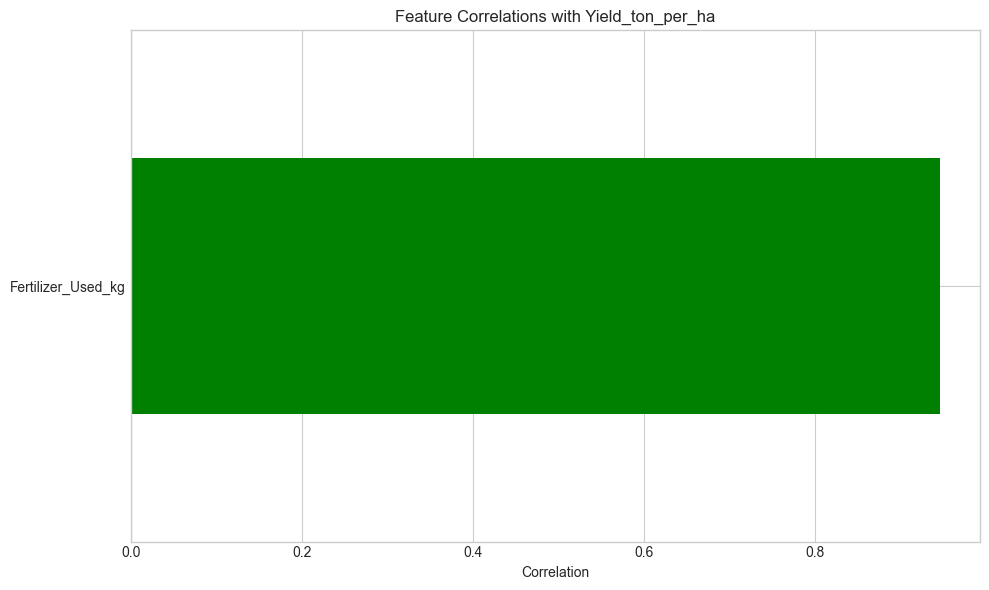

In [74]:
# Visualize correlations with target
plt.figure(figsize=(10, 6))
colors = ['green' if c > 0 else 'red' for c in target_correlations]
target_correlations.plot(kind='barh', color=colors)
plt.xlabel('Correlation')
plt.title(f'Feature Correlations with {TARGET}')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

### 4.5 Feature vs Target Relationships

*Create scatter plots for your most promising numerical features against the target.*

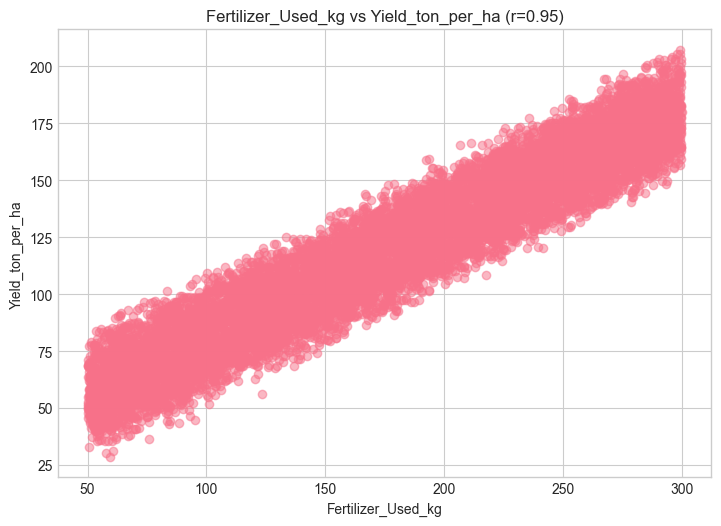

In [75]:
# Select top correlated features to plot
top_features = target_correlations.abs().sort_values(ascending=False).head(4).index.tolist()

if len(top_features) > 0:
    n_features = min(4, len(top_features))
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    for i, feature in enumerate(top_features[:n_features]):
        axes[i].scatter(df[feature], df[TARGET], alpha=0.5)
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(TARGET)
        corr = df[feature].corr(df[TARGET])
        axes[i].set_title(f'{feature} vs {TARGET} (r={corr:.2f})')

    # Hide unused subplots
    for j in range(n_features, 4):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No numerical features to plot.")

### 4.6 Additional Exploration (Your Choice!)

The sections above provide a foundation, but every dataset is unique. Use the cells below to explore additional aspects of YOUR data that you think are important.

**Ideas for additional exploration:**
- Violin plots for categorical vs target (shows distribution shape)
- Look at feature interactions (e.g., does the relationship between X and Y change based on Z?)
- Explore geographic patterns (if you have location data)
- Create pair plots for key features (`sns.pairplot()`)
- Analyze distributions across different subgroups
- Look for data quality issues specific to your dataset
- Check for nonsensical values (negative prices, impossible ages, etc.)

**Remember:** The best insights often come from curiosity-driven exploration, not just following a template. What questions do YOU have about your data?

In [ ]:
# YOUR ADDITIONAL EDA CODE HERE
# Add as many cells as you need - don't be limited by this template!



In [ ]:
# More exploration...



**What additional insights did you discover?**

[Describe any additional findings from your custom exploration]

### 4.7 EDA Insights Summary

*Summarize your key findings from the EDA.*

**Questions to answer:**
- Which features are most correlated with your target?
- Which categorical features show the biggest differences in target?
- Are there any features that seem unimportant?
- Did you discover any interesting patterns or relationships?
- Are there any concerns about the data (outliers, skewness, etc.)?

**Your summary:**

Seems like the two biggest featurs are rainfall and the amount of fertilizer used. 
All of the categorical features are pretty neck and neck.
Most of the features do not appear to have a significant effect on the target.
Not yet.
I am concerned that a lot of my features are really interchangable as far as not having a huge effect on the outcome. 

## Section 5: Data Cleaning

### 5.1 Decide What to Drop

Before cleaning, decide which columns to remove entirely.

In [170]:
# TODO: Create a copy of your dataframe for cleaning
#
# Why? We want to preserve the original data in case we need to go back.
# Never modify your original dataframe directly!
#
# Store in: df_clean

# YOUR CODE HERE:
df_clean = df

print(f"Starting shape: {df_clean.shape}")

Starting shape: (10000, 13)


In [171]:
# Identify columns to potentially drop
print("Columns to consider dropping:")
print("="*50)

# 1. High missing rate
high_missing = missing_df[missing_df['Missing %'] > 50].index.tolist()
print(f"\n1. >50% missing values: {high_missing}")

# 2. ID/index columns (no predictive value)
potential_ids = [col for col in df_clean.columns 
                 if 'id' in col.lower() or 'index' in col.lower() or 'url' in col.lower()]
print(f"\n2. Potential ID/URL columns: {potential_ids}")

# 3. High cardinality categorical (too many unique values)
high_cardinality = [col for col in categorical_cols if df_clean[col].nunique() > 100]
print(f"\n3. High cardinality (>100 unique): {high_cardinality}")

# 4. Low variance (same value in most rows)
low_variance = [col for col in df_clean.columns 
                if df_clean[col].value_counts(normalize=True).iloc[0] > 0.95]
print(f"\n4. Low variance (>95% same value): {low_variance}")

Columns to consider dropping:

1. >50% missing values: []

2. Potential ID/URL columns: ['Humidity_pct', 'Pesticides_Used_kg']

3. High cardinality (>100 unique): []

4. Low variance (>95% same value): []


In [185]:
# Drop columns
# TODO: Decide which columns to drop based on the analysis above
# IMPORTANT: Don't just copy all suggestions - think about each one!

columns_to_drop = [
    "Soil_pH",
    "Pesticides_Used_kg",
    "Planting_Density"
]

if columns_to_drop:
    df_clean = df_clean.drop(columns=columns_to_drop)
    print(f"Dropped {len(columns_to_drop)} columns: {columns_to_drop}")
    print(f"New shape: {df_clean.shape}")
else:
    print("No columns dropped. Update the list above if needed.")

KeyError: "['Soil_pH', 'Pesticides_Used_kg', 'Planting_Density'] not found in axis"

**Explain which columns you dropped and why:**

[Describe your reasoning]

### 5.2 Handle Duplicate Rows

In [173]:
# TODO: Remove duplicate rows from df_clean
#
# Steps:
# 1. Store the row count before: len(df_clean)
# 2. Use df_clean.drop_duplicates() to remove duplicates (assign back to df_clean)
# 3. Store the row count after
# 4. Print how many duplicates were removed

# YOUR CODE HERE:
length_before = len(df_clean)
df_clean = df_clean.drop_duplicates()
length_after = len(df_clean)

print(f"Before: {length_before}, After: {length_after}, number removed: {length_before - length_after}")

Before: 10000, After: 10000, number removed: 0


### 5.3 Handle Missing Values

In [174]:
# Check missing values in cleaned dataframe
print("Missing values before handling:")
missing_now = df_clean.isnull().sum()
missing_now = missing_now[missing_now > 0].sort_values(ascending=False)
print(missing_now)

Missing values before handling:
Irrigation       2538
Previous_Crop    2031
dtype: int64


In [175]:
# Handle missing values
# TODO: Add your missing value handling code here
# 
# STRATEGIES:
# - Numerical columns: use median (robust to outliers) or mean
# - Categorical columns: use mode or 'Unknown'
# - Drop rows if missing target variable
#
# Examples:
# df_clean['column'] = df_clean['column'].fillna(df_clean['column'].median())
# df_clean['column'] = df_clean['column'].fillna('Unknown')
# df_clean = df_clean.dropna(subset=[TARGET])  # Don't predict with missing target!

# YOUR CODE HERE:

df_clean['Irrigation'] = df_clean['Irrigation'].fillna('Unknown')
df_clean['Previous_Crop'] = df_clean['Previous_Crop'].fillna('Unknown')


In [176]:
# Verify missing values are handled
remaining_missing = df_clean.isnull().sum().sum()
print(f"Missing values after cleaning: {remaining_missing}")

if remaining_missing > 0:
    print("\n⚠️ Still have missing values in:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

Missing values after cleaning: 0


**Explain your missing value strategy:**

I knew I only had missing values in the categorical features, but none in the numerical features. The target is a numerical feature so all I did was set the two categorical columns with missing values to unknown. 

### 5.4 Handle Outliers (if needed)

In [177]:
# Check for outliers using IQR method
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    n_outliers = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
    return n_outliers, lower_bound, upper_bound

# Get current numerical columns
current_numerical = df_clean.select_dtypes(include=[np.number]).columns.tolist()

print("Outlier analysis:")
print("="*60)
for col in current_numerical:
    n_outliers, lower, upper = find_outliers_iqr(df_clean, col)
    if n_outliers > 0:
        pct = n_outliers / len(df_clean) * 100
        print(f"{col}: {n_outliers:,} outliers ({pct:.1f}%) | bounds: [{lower:.2f}, {upper:.2f}]")

Outlier analysis:


In [178]:
# Handle outliers (if needed)
# TODO: Add your outlier handling code here if needed
#
# STRATEGIES:
# - Remove rows with outliers (be careful - losing data)
# - Cap/clip values at bounds
# - Keep them (if they're valid data points)
#
# Examples:
# df_clean = df_clean[df_clean['price'] > 0]  # Remove invalid prices
# df_clean = df_clean[df_clean['price'] < 500000]  # Remove extreme prices
# df_clean['column'] = df_clean['column'].clip(lower=0, upper=upper_bound)

# YOUR CODE HERE:



**Explain your outlier handling strategy (or why you kept them):**

[Describe what you did and why]

### 5.5 Data Type Corrections

In [179]:
# Check current data types
print("Current data types:")
print(df_clean.dtypes)

Current data types:
Crop                   object
Region                 object
Soil_Type              object
Rainfall_mm           float64
Temperature_C         float64
Humidity_pct          float64
Fertilizer_Used_kg    float64
Irrigation             object
Previous_Crop          object
Yield_ton_per_ha      float64
dtype: object


In [133]:
# Fix any data type issues
# TODO: Add your data type corrections here if needed
#
# Examples:
# df_clean['year'] = df_clean['year'].astype(int)
# df_clean['date_column'] = pd.to_datetime(df_clean['date_column'])
# df_clean['category'] = df_clean['category'].astype('category')

# YOUR CODE HERE:

#I don't see any data type issues

## Section 6: Feature Engineering

Feature engineering is where you can really add value! The sections below cover common techniques, but feel free to go beyond these basics.

### 6.1 Create New Features (if applicable)

**Common feature engineering techniques:**
- **Ratios/interactions:** Combine existing features (e.g., price per square foot)
- **Log transforms:** Reduce skewness in highly skewed features
- **Binning:** Convert continuous variables to categories
- **Text features:** Extract length, word counts, etc. from text
- **Domain-specific:** Features that make sense for your specific problem

Think about what would help YOUR specific prediction problem!

In [134]:
# Create new features
# TODO: Add your feature engineering code here
#
# Examples:
# df_clean['price_per_sqft'] = df_clean['price'] / df_clean['sqft']
# df_clean['log_price'] = np.log1p(df_clean['price'])
# df_clean['age'] = 2026 - df_clean['year']

# YOUR CODE HERE:

# I can not think of any new features at this time, but if I do I will come back and add them.

**Explain your new features:**

I can not think of any new features at this time, but if I do I will come back and add them.

### 6.2 Encode Categorical Variables

In [180]:
# TODO: Identify categorical columns that need encoding
#
# Steps:
# 1. Get categorical columns using select_dtypes(include=['object', 'category'])
# 2. For each column, print:
#    - Column name
#    - Number of unique values: .nunique()
#    - Recommendation: "one-hot encoding" if <= 10 unique, else "consider label encoding or dropping"
#
# Store in: cat_cols

# YOUR CODE HERE:

cat_cols = df_clean.select_dtypes(include=['object', 'category'])
for col in cat_cols:
    print(f"Column name: {col}")
    print(f"Number of unique values: {df_clean[col].nunique()}")
    if df_clean[col].nunique() <= 10:
        print("one hot encoding")
    else:
        print("consider label encoding or dropping")

Column name: Crop
Number of unique values: 4
one hot encoding
Column name: Region
Number of unique values: 4
one hot encoding
Column name: Soil_Type
Number of unique values: 3
one hot encoding
Column name: Irrigation
Number of unique values: 4
one hot encoding
Column name: Previous_Crop
Number of unique values: 5
one hot encoding


In [181]:
# Encode categorical variables
# TODO: Add your encoding code here
#
# STRATEGIES:
# - One-hot encoding: for low cardinality (< 10 unique values)
# - Label encoding: for ordinal data or high cardinality
# - Target encoding: advanced technique (be careful of data leakage)
#
# Examples:
# One-hot encoding:
# df_clean = pd.get_dummies(df_clean, columns=['category_col'], drop_first=True)
#
# Label encoding:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_clean['encoded_col'] = le.fit_transform(df_clean['category_col'])

# YOUR CODE HERE:

#for col in cat_cols:
#    df_enc = pd.get_dummies(df_clean, col, drop_first=True)

df_enc = pd.get_dummies(df_clean, columns=['Crop', 'Region', 'Soil_Type', 'Irrigation', 'Previous_Crop'])

df_clean = df_enc

df_clean

,Rainfall_mm,Temperature_C,Humidity_pct,Fertilizer_Used_kg,Yield_ton_per_ha,Crop_Barley,Crop_Maize,Crop_Rice,Crop_Wheat,Region_Region_A,Region_Region_B,Region_Region_C,Region_Region_D,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Sandy,Irrigation_Drip,Irrigation_Flood,Irrigation_Sprinkler,Irrigation_Unknown,Previous_Crop_Barley,Previous_Crop_Maize,Previous_Crop_Rice,Previous_Crop_Unknown,Previous_Crop_Wheat
0,1485.4,19.7,40.3,105.1,101.48,False,True,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False
1,399.4,29.1,55.4,221.8,127.39,True,False,False,False,False,False,False,True,False,True,False,False,False,True,False,True,False,False,False,False
2,980.9,30.5,74.4,61.2,68.99,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True
3,1054.3,26.4,62.0,257.8,169.06,False,True,False,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,True,False
4,744.6,20.4,70.9,195.8,118.71,False,True,False,False,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,890.4,28.5,68.6,82.5,79.83,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True
9996,614.2,30.0,84.2,85.2,68.24,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False
9997,842.0,22.6,75.1,249.2,159.29,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False
9998,924.2,26.8,50.8,146.1,99.08,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False


**Explain your encoding strategy:**

I ended up using one-hot encoding for all of the categorical features since there were only 3-5 unique items per feature. 

### 6.3 Additional Feature Engineering (Your Choice!)

Every dataset has unique opportunities for feature engineering. What else makes sense for YOUR data?

**Think about:**
- What domain knowledge can you apply?
- Are there any feature interactions that might be predictive?
- Can you create meaningful groups or categories?
- Would polynomial features help capture non-linear relationships?

In [ ]:
# YOUR ADDITIONAL FEATURE ENGINEERING CODE HERE
# Add as many cells as you need!

# I cannot think of additional features at this time, but I will add some in the future when I do. 

**Explain your additional feature engineering:**

I cannot think of additional features at this time, but I will add some in the future when I do. 

### 6.4 Feature Scaling (Preparation)

We'll do actual scaling in the modeling notebook, but let's check which features might need it.

In [194]:
# TODO: Identify numerical features and check their ranges
#
# Steps:
# 1. Get numerical columns from df_clean (excluding TARGET)
# 2. For each column, print the min, max, and range
#
# This helps you understand if features need scaling (different scales = need scaling)
#
# Store in: numerical_features

# YOUR CODE HERE:
'''
for col in numerical_cols:
    min_val = df_numerical[col].min()
    max_val = df_numerical[col].max()
    range_val = max_val - min_val

    print(f"For column: {col}, min: {min_val}, max: {max_val}, range: {range_val}")
'''
df_new = df_clean

min_val = df_numerical['Rainfall_mm'].min()
max_val = df_numerical['Rainfall_mm'].max()
range_val = max_val - min_val
print(f"For column: {'Rainfall_mm'}, min: {min_val}, max: {max_val}, range: {range_val}")

df_new['Rainfall_mm_min'] = df_numerical['Rainfall_mm'].min()
df_new['Rainfall_mm_max'] = df_numerical['Rainfall_mm'].max()
df_new['Rainfall_mm_range'] = df_numerical['Rainfall_mm'].max() - df_numerical['Rainfall_mm'].min()

min_val = df_numerical['Temperature_C'].min()
max_val = df_numerical['Temperature_C'].max()
range_val = max_val - min_val
print(f"For column: {'Temperature_C'}, min: {min_val}, max: {max_val}, range: {range_val}")

df_new['Temperature_C_min'] = df_numerical['Temperature_C'].min()
df_new['Temperature_C_max'] = df_numerical['Temperature_C'].max()
df_new['Temperature_C_range'] = df_numerical['Temperature_C'].max() - df_numerical['Temperature_C'].min()

min_val = df_numerical['Humidity_pct'].min()
max_val = df_numerical['Humidity_pct'].max()
range_val = max_val - min_val
print(f"For column: {'Humidity_pct'}, min: {min_val}, max: {max_val}, range: {range_val}")

df_new['Humidity_pct_min'] = df_numerical['Humidity_pct'].min()
df_new['Humidity_pct_max'] = df_numerical['Humidity_pct'].max()
df_new['Humidity_pct_range'] = df_numerical['Humidity_pct'].max() - df_numerical['Humidity_pct'].min()

min_val = df_numerical['Fertilizer_Used_kg'].min()
max_val = df_numerical['Fertilizer_Used_kg'].max()
range_val = max_val - min_val
print(f"For column: {'Fertilizer_Used_kg'}, min: {min_val}, max: {max_val}, range: {range_val}")

df_new['Fertilizer_Used_kg_min'] = df_numerical['Fertilizer_Used_kg'].min()
df_new['Fertilizer_Used_kg_max'] = df_numerical['Fertilizer_Used_kg'].max()
df_new['Fertilizer_Used_kg_range'] = df_numerical['Fertilizer_Used_kg'].max() - df_numerical['Fertilizer_Used_kg'].min()

df_clean = df_new

For column: Rainfall_mm, min: 200.0, max: 1499.7, range: 1299.7
For column: Temperature_C, min: 15.0, max: 35.0, range: 20.0
For column: Humidity_pct, min: 30.0, max: 90.0, range: 60.0
For column: Fertilizer_Used_kg, min: 50.0, max: 300.0, range: 250.0


### 6.5 Final Sanity Checks

In [195]:
# Final data quality checks before saving
print("="*60)
print("FINAL DATA QUALITY CHECKS")
print("="*60)

print(f"\n1. Shape: {df_clean.shape[0]:,} rows, {df_clean.shape[1]} columns")
print(f"   (Started with {df.shape[0]:,} rows, {df.shape[1]} columns)")

print(f"\n2. Missing values: {df_clean.isnull().sum().sum()}")

print(f"\n3. Duplicate rows: {df_clean.duplicated().sum()}")

print(f"\n4. Target variable '{TARGET}':")
print(f"   - Min: {df_clean[TARGET].min():.2f}")
print(f"   - Max: {df_clean[TARGET].max():.2f}")
print(f"   - Mean: {df_clean[TARGET].mean():.2f}")

# Check for data leakage red flags
print(f"\n5. Data types:")
print(f"   - Numerical: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categorical: {len(df_clean.select_dtypes(include=['object', 'category']).columns)}")

remaining_cats = df_clean.select_dtypes(include=['object', 'category']).columns.tolist()
if remaining_cats:
    print(f"\n⚠️ Still have categorical columns: {remaining_cats}")
    print("   Make sure these are encoded before modeling!")
else:
    print("\n✓ All features are numerical. Ready for modeling!")

FINAL DATA QUALITY CHECKS

1. Shape: 10,000 rows, 37 columns
   (Started with 10,000 rows, 13 columns)

2. Missing values: 0

3. Duplicate rows: 0

4. Target variable 'Yield_ton_per_ha':
   - Min: 28.45
   - Max: 207.21
   - Mean: 117.89

5. Data types:
   - Numerical: 17
   - Categorical: 0

✓ All features are numerical. Ready for modeling!


### 6.6 Save Processed Data

In [196]:
# Final check of cleaned data
print("Final cleaned dataset:")
print(f"Shape: {df_clean.shape}")
print(f"\nColumns ({len(df_clean.columns)}):")
print(df_clean.columns.tolist())
print(f"\nData types:")
print(df_clean.dtypes)

Final cleaned dataset:
Shape: (10000, 37)

Columns (37):
['Rainfall_mm', 'Temperature_C', 'Humidity_pct', 'Fertilizer_Used_kg', 'Yield_ton_per_ha', 'Crop_Barley', 'Crop_Maize', 'Crop_Rice', 'Crop_Wheat', 'Region_Region_A', 'Region_Region_B', 'Region_Region_C', 'Region_Region_D', 'Soil_Type_Clay', 'Soil_Type_Loam', 'Soil_Type_Sandy', 'Irrigation_Drip', 'Irrigation_Flood', 'Irrigation_Sprinkler', 'Irrigation_Unknown', 'Previous_Crop_Barley', 'Previous_Crop_Maize', 'Previous_Crop_Rice', 'Previous_Crop_Unknown', 'Previous_Crop_Wheat', 'Rainfall_mm_min', 'Rainfall_mm_max', 'Rainfall_mm_range', 'Temperature_C_min', 'Temperature_C_max', 'Temperature_C_range', 'Humidity_pct_min', 'Humidity_pct_max', 'Humidity_pct_range', 'Fertilizer_Used_kg_min', 'Fertilizer_Used_kg_max', 'Fertilizer_Used_kg_range']

Data types:
Rainfall_mm                 float64
Temperature_C               float64
Humidity_pct                float64
Fertilizer_Used_kg          float64
Yield_ton_per_ha            float64
Crop

In [197]:
# Save cleaned data
df_clean.to_csv('../data/processed/cleaned_data.csv', index=False)
print("✓ Cleaned data saved to ../data/processed/cleaned_data.csv")

✓ Cleaned data saved to ../data/processed/cleaned_data.csv


### 6.7 Feature Engineering Summary

*Summarize all the data cleaning and feature engineering you performed.*

**Checklist:**
- [ ] Columns dropped (with justification)
- [ ] Duplicate rows removed
- [ ] Missing values handled
- [ ] Outliers addressed (or documented why not)
- [ ] Data types corrected
- [ ] New features created (if applicable)
- [ ] Categorical variables encoded
- [ ] Data saved to processed folder

**Summary of changes:**

I took the raw data from the csv and transformed it into a machine readable file. I analyzed the different features I had by plotting them. I checked for missing or duplicate values, corrected the missing categorical values. I then transformed the categorical values into something the model can use using one hot encoding. I created new numerical features based on the min max and range of the numerical categories. Once the data is scaled, it will be ready to be fed into a model. 

**Final feature list for modeling:**

At this time I plan to use all of the features and then see how each one contributes to the accuracy of the model. If I see one that doesn't contribute at all, or has a negative impact, I will remove that feature. The features I think will have the biggest impact at this time are fertilizer used, rainfall, and temperature. 

---

## ✅ Checkpoint 2 Submission Instructions

**Congratulations!** You've completed Checkpoint 2 (EDA, Data Cleaning, and Feature Engineering).

### Step 1: Save This Notebook
- File → Save (or Ctrl+S / Cmd+S)

### Step 2: Commit to GitHub

```bash
# Stage your changes
git add notebooks/01_problem_statement_and_eda.ipynb
git add data/processed/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 2: EDA, data cleaning, and feature engineering"

# Push to GitHub
git push
```

### Step 3: Submit to Canvas
1. Go to the Checkpoint 2 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

You're ready to move on to **Notebook 02: Regression Model**!

In that notebook, you'll:
1. Load your cleaned data
2. Split into train/test sets
3. Build and evaluate regression models
4. Save your best model

---